In [1]:
# load data
import pandas as pd

df = pd.read_csv('data/joined_data.csv')

## Model Preparation
Split the data into training and testing sets, select the target variable, and decide on the predictor variables.

In [2]:
from sklearn.model_selection import train_test_split

# Define predictors and target
X = df.drop(['Date', 'RenewablePercentage'], axis=1)
y = df['RenewablePercentage']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building
Select and train a model that fits your hypothesis or prediction goals.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


NameError: name 'model' is not defined

### Feature Importance

In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


                              importance
Avg_Wind_Speed                  0.529537
Avg_Max_Temp                    0.187544
Avg_Cloudiness                  0.071440
Avg_Sunshine_Hours              0.049948
Temp_Range                      0.045995
Avg_Temp                        0.033244
Avg_Wind_Duration_Over_10m_s    0.018438
DayOfWeek                       0.018415
Month                           0.017521
Avg_Precipitation               0.016093
Avg_Min_Temp                    0.011824
Avg_Actinometry                 0.000000


### Visualizing Predictions
Sometimes, visualizing the predictions against the actual values can provide a clearer picture of where the model is performing well and where it is not

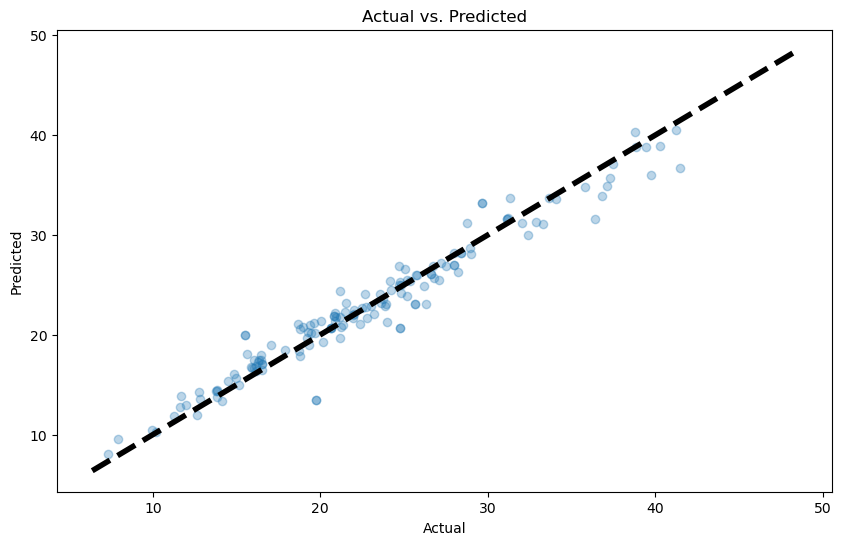

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


It looks like your model has performed quite well based on the evaluation metrics and the scatter plot of the Actual vs. Predicted values. Here’s a summary and some insights:

### Evaluation Metrics
- **MAE of 1.22** and **RMSE of 1.73**: These values are quite low, indicating that on average, your model's predictions are close to the actual data points. Given the range of percentages you're predicting, this level of error is relatively minor.
- **R-squared of 0.95**: This is an excellent score, suggesting that your model explains 95% of the variance in the target variable from the predictors. It indicates strong predictive power.

### Scatter Plot Analysis
- The points are closely aligned with the dashed line representing the ideal prediction, showing that your model predictions closely match the actual values.
- The spread of points around the line is consistent, without any noticeable patterns of deviation, which suggests that the model errors are randomly distributed and not biased.

### Feature Importance
- **`Avg_Wind_Speed` is the most significant predictor**, with over 50% importance. This suggests that wind speed is a critical factor in determining the Renewable Percentage, likely because wind energy contributes significantly to renewable energy sources.
- **Temperature and cloudiness** also show substantial importance, which might reflect their impact on solar and wind energy production.
- **`Avg_Actinometry` has zero importance**, indicating that this variable does not influence the Renewable Percentage in your model. This might be due to redundancy with other features or a lack of variation in actinometry data.

### Suggestions for Improvement
1. **Model Tuning**: You could experiment with different parameters for the RandomForestRegressor or try other algorithms that might capture complex patterns more effectively (e.g., Gradient Boosting or a neural network approach).
2. **Feature Engineering**: Additional features could be explored, especially time-based features (like hour of the day if hourly data becomes available) or interactions between features that could capture more complex dynamics.
3. **Cross-Validation**: Implement cross-validation to ensure that your model's performance is robust across different subsets of the data.
4. **Deeper Analysis of Feature Importance**: Given the high importance of wind speed, consider models that can explore non-linear relationships or interactions between features to potentially enhance model performance.
5. **Data Collection**: More data, particularly for variables that show potential importance, could help improve the model's accuracy and robustness.

These insights and improvements can guide further development of your forecasting model, making it even more reliable and valuable for decision-making or predictive analytics in renewable energy contexts.